In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
from os.path import join, abspath
import sys
from os import pardir, mkdir

In [2]:
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if sys.path is not root_dir:
    sys.path.append(root_dir)

sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, phi

In [5]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [7]:
spectral_dir = join(root_data_dir, "Spectral-Class")
spectral_dir

'/home2/s20321005/Thesis-Project/Data/Spectral-Class'

In [8]:
name = "Velocity-Distribution"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution already exist. Good to go!


In [9]:
files = glob(join(spectral_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(-0.10)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.19)_(0.25).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.25)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.30)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.34)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class/gaia_(0.37)_(0.40).hdf5']

In [10]:
index = 5
gaia_raw = vaex.open(files[index])
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.005220332152592599,-1.2472149363756106,9.679,9.292,AAA,4702044747287925888,5.953322,-4.878325554768022,0.012328528,-3.412328263413079,0.013413801,5.906541504010318,0.011774631,10.679057,11.017059,10.182057,1367.9883,2529.5535,0.9734569,1.1965036,2.2437111273254207,-0.7874142381555977,168.7038,168.3756,169.0502,0.0721,0.0702,0.0741,G,--,27.62563133239746,0.3174717426300049,gaia,5805.04541015625,3.2939453125,3.57666015625,0.0,gspphot,4.456299781799316,0.001399993896484375,0.0011000633239746094,0.0,gspphot,0.37929999828338623,0.0034999847412109375,0.003899991512298584,0.0,gspphot,0.10999999940395355,0.030000001192092896,0.019999995827674866,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.38700008,3.535666200843578,169.30381329260751,-119.95698715315031,119.47427517485526,3.7553728541694067,4.619439264862996,0.012413464985366399,0.013335236777091612,3.7071003565426492,3.013686997150049,0.013005222340576255,0.011633172738116492,-16.95758836676508,0.2251256911385725,22.12144426456764,0.22422280518725107,-11.430860769031623,0.14004669026873773,-19.17748752433899,0.17549393613104425,2.9564801601290416,4.251074279634666
1,0.01234528975800905,-1.231587904025077,9.754,9.366,AAA,4702904286207624320,31.48447,31.093736648384194,0.014331686,-4.944838937083015,0.013836097,6.588620257673664,0.013783502,10.734539,11.055819,10.25146,1114.0681,1807.6669,1.0403253,1.1962733,2.2465928384637257,-0.8030835776899604,151.4281,151.1048,151.7459,0.0002,0.0,0.0006,G,--,17.690340042114258,0.28922533988952637,gaia,5792.77978515625,1.9619140625,2.11181640625,0.0,gspphot,4.427499771118164,0.002899646759033203,0.0029001235961914062,0.0,gspphot,-0.27799999713897705,0.005800008773803711,0.006399989128112793,0.0,gspphot,0.09000000357627869,0.04000000283122063,0.03999999165534973,0.0,gspspec,-0.2199999988079071,0.1599999964237213,0.12999999523162842,0.0,gspspec,-0.2199999988079071,nan,nan,nan,--,0.38799953,3.8479720962427164,151.776845665876,-109.20359622369978,105.40771059127644,-31.27491570549239,-3.6265049961509788,0.014296200205580537,0.013872760057340682,-2.60898837836877,-22.499870177125093,-0.011375328765021682,-0.048180656200071,-14.540137748021865,0.2082478308994546,10.408618805232711,0.20103118231855613,-24.06538885207155,0.1312472725530063,5.95319769692874,0.1597155763964895,2.976753810032051,4.256824848722696
2,0.0045153064012494895,-1.0924962629351715,9.473,9.097,AAA,4904702229393600256,10.949072,6.8911403201005195,0.015984293,8.508487848203863,0.015616351,5.121154464258306,0.014408366,10.470099,10.792497,9.982636,1206.7808,1809.4757,1.1645453,1.1983753,2.3154694677958245,-0.9349712288025431,193.953,193.3452,194.63,0.0162,0.0087,0.0232,G,--,15.487279891967773,0.6039208769798279,gaia,5710.28271484375,13.8359375,12.634765625,0.0,gspphot,4.133500099182129,0.005199909210205078,0.005000114440917969,0.0,gspphot,-0.04089999943971634,0.017799999564886093,0.010599998757243156,0.0,gspphot,0.30000001192092896,0.030000001192092896,0.09999999403953552,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.37599945,3.0198389488633453,195.2684706113096,-157.10949523727822,115.95853621518138,-3.730566349214333,-10.293932926168578,0.015945366736672132,0.015656095210011996,-9.527781755183938,-3.4529098113889716,-0.03047242023

In [11]:
gaia = gaia_raw.filter("Dist>50")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.005220332152592599,-1.2472149363756106,9.679,9.292,AAA,4702044747287925888,5.953322,-4.878325554768022,0.012328528,-3.412328263413079,0.013413801,5.906541504010318,0.011774631,10.679057,11.017059,10.182057,1367.9883,2529.5535,0.9734569,1.1965036,2.2437111273254207,-0.7874142381555977,168.7038,168.3756,169.0502,0.0721,0.0702,0.0741,G,--,27.62563133239746,0.3174717426300049,gaia,5805.04541015625,3.2939453125,3.57666015625,0.0,gspphot,4.456299781799316,0.001399993896484375,0.0011000633239746094,0.0,gspphot,0.37929999828338623,0.0034999847412109375,0.003899991512298584,0.0,gspphot,0.10999999940395355,0.030000001192092896,0.019999995827674866,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.38700008,3.535666200843578,169.30381329260751,-119.95698715315031,119.47427517485526,3.7553728541694067,4.619439264862996,0.012413464985366399,0.013335236777091612,3.7071003565426492,3.013686997150049,0.013005222340576255,0.011633172738116492,-16.95758836676508,0.2251256911385725,22.12144426456764,0.22422280518725107,-11.430860769031623,0.14004669026873773,-19.17748752433899,0.17549393613104425,2.9564801601290416,4.251074279634666
1,0.01234528975800905,-1.231587904025077,9.754,9.366,AAA,4702904286207624320,31.48447,31.093736648384194,0.014331686,-4.944838937083015,0.013836097,6.588620257673664,0.013783502,10.734539,11.055819,10.25146,1114.0681,1807.6669,1.0403253,1.1962733,2.2465928384637257,-0.8030835776899604,151.4281,151.1048,151.7459,0.0002,0.0,0.0006,G,--,17.690340042114258,0.28922533988952637,gaia,5792.77978515625,1.9619140625,2.11181640625,0.0,gspphot,4.427499771118164,0.002899646759033203,0.0029001235961914062,0.0,gspphot,-0.27799999713897705,0.005800008773803711,0.006399989128112793,0.0,gspphot,0.09000000357627869,0.04000000283122063,0.03999999165534973,0.0,gspspec,-0.2199999988079071,0.1599999964237213,0.12999999523162842,0.0,gspspec,-0.2199999988079071,nan,nan,nan,--,0.38799953,3.8479720962427164,151.776845665876,-109.20359622369978,105.40771059127644,-31.27491570549239,-3.6265049961509788,0.014296200205580537,0.013872760057340682,-2.60898837836877,-22.499870177125093,-0.011375328765021682,-0.048180656200071,-14.540137748021865,0.2082478308994546,10.408618805232711,0.20103118231855613,-24.06538885207155,0.1312472725530063,5.95319769692874,0.1597155763964895,2.976753810032051,4.256824848722696
2,0.0045153064012494895,-1.0924962629351715,9.473,9.097,AAA,4904702229393600256,10.949072,6.8911403201005195,0.015984293,8.508487848203863,0.015616351,5.121154464258306,0.014408366,10.470099,10.792497,9.982636,1206.7808,1809.4757,1.1645453,1.1983753,2.3154694677958245,-0.9349712288025431,193.953,193.3452,194.63,0.0162,0.0087,0.0232,G,--,15.487279891967773,0.6039208769798279,gaia,5710.28271484375,13.8359375,12.634765625,0.0,gspphot,4.133500099182129,0.005199909210205078,0.005000114440917969,0.0,gspphot,-0.04089999943971634,0.017799999564886093,0.010599998757243156,0.0,gspphot,0.30000001192092896,0.030000001192092896,0.09999999403953552,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.37599945,3.0198389488633453,195.2684706113096,-157.10949523727822,115.95853621518138,-3.730566349214333,-10.293932926168578,0.015945366736672132,0.015656095210011996,-9.527781755183938,-3.4529098113889716,-0.03047242023

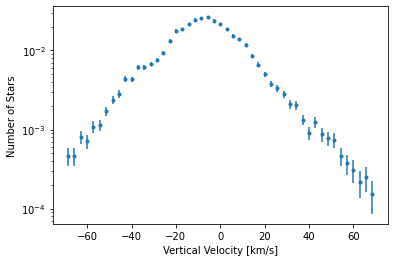

In [12]:
ws = gaia['w'].to_numpy()
wedge = np.linspace(-70, 70, 50)
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
werr = np.sqrt(wnum)
area = wnum.sum() * (wedge[1] - wedge[0])
plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.yscale("log")
plt.show()

In [13]:
# fit with double gaussian
from scipy.stats import norm
from scipy.optimize import curve_fit

def double_gaussian(x, a1, mu1, sigma1, a2, mu2, sigma2):
    return a1*norm.pdf(x, mu1, sigma1) + a2*norm.pdf(x, mu2, sigma2)

In [14]:
def triple_gaussian(x, a1, mu1, sigma1, a2, mu2, sigma2, a3, mu3, sigma3):
    return a1*norm.pdf(x, mu1, sigma1) + a2*norm.pdf(x, mu2, sigma2) + a3*norm.pdf(x, mu3, sigma3)

In [15]:
def n_gaussian(x, *args):
    n = len(args) // 3
    y = 0
    for i in range(n):
        a, mu, sigma = args[3*i:3*i+3]
        y += a*norm.pdf(x, mu, sigma)
    return y

[ 9.42235856e-01 -7.41971182e+00  9.51415355e+00  1.76029492e-02
 -3.83168207e+01  4.68714864e+00  3.19712944e-02  1.17835470e+01
  4.47044800e+00]


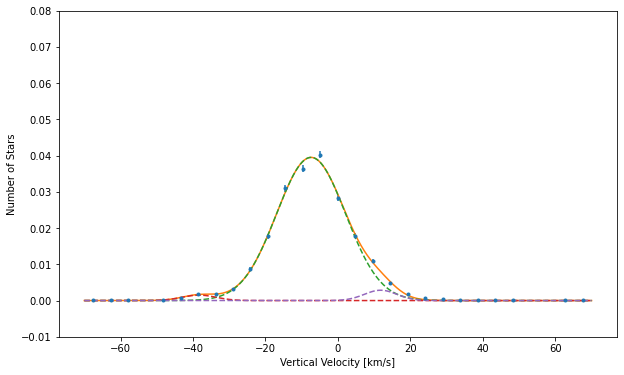

In [22]:
plt.figure(figsize=(10, 6))
gaia_raw = vaex.open(files[1])
gaia = gaia_raw.filter("Dist>50")
gaia = gaia.extract()
ws = gaia['w'].to_numpy()
wedge = np.linspace(-70, 70, 30)
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
mask = wnum > 0
wmid = wmid[mask]
wnum = wnum[mask]
area = wnum.sum() * (wedge[1] - wedge[0])
dim = 3
p1 = [1, -7, 10]
p2 = [0.1, -40, 5]
a_rest = np.random.rand(dim-2)+0.1
mu_rest = np.random.rand(dim-2)*80-40
sigma_rest = np.random.uniform(1, 10, dim-2)
p_rest = np.array([(a, mu, sigma) for a, mu, sigma in zip(a_rest, mu_rest, sigma_rest)]).flatten()
p0 = np.concatenate([p1, p2, p_rest])

popt, pcov = curve_fit(n_gaussian, wmid, wnum/area, p0=p0, maxfev = 10000)
ws = np.linspace(-70, 70, 1000)
fw = n_gaussian(ws, *popt)

werr = np.sqrt(wnum)
print(popt)
plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')
plt.plot(ws, fw)
for i in range(len(popt)//3):
    plt.plot(ws, popt[3*i]*norm.pdf(ws, popt[3*i+1], popt[3*i+2]), '--')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.ylim(-0.01, 0.08)
plt.show()

In [23]:
# 5
popt_s = """
5.86535738e-01 -7.72995535e+00  1.15540914e+01  2.95719480e-02
 -4.01978749e+01  5.48106788e+00  3.65610207e-01 -5.88769325e+00
  2.74223383e+01  2.22858512e-02  1.21479542e+01  4.32532257e+00
  """
popt_5 = np.fromstring(popt_s, sep=' ')
popt_5

array([ 5.86535738e-01, -7.72995535e+00,  1.15540914e+01,  2.95719480e-02,
       -4.01978749e+01,  5.48106788e+00,  3.65610207e-01, -5.88769325e+00,
        2.74223383e+01,  2.22858512e-02,  1.21479542e+01,  4.32532257e+00])

In [24]:
# 4
popt_s = """
3.52012444e-02  1.14654954e+01  5.05818042e+00  2.33863091e-02
 -3.80654341e+01  5.45850019e+00  4.47795404e-01 -8.07377826e+00
  2.49472091e+01  4.95216914e-01 -7.83672580e+00  1.06185356e+01
  """
popt_4 = np.fromstring(popt_s, sep=' ')
popt_4

array([ 3.52012444e-02,  1.14654954e+01,  5.05818042e+00,  2.33863091e-02,
       -3.80654341e+01,  5.45850019e+00,  4.47795404e-01, -8.07377826e+00,
        2.49472091e+01,  4.95216914e-01, -7.83672580e+00,  1.06185356e+01])

In [25]:
# 3
popt_s = """
4.01300117e-01 -1.12084225e+01  9.38039308e+00  8.51191346e-02
 -3.75149727e+01  7.61057295e+00  5.14487346e-01  2.81436037e-01
  1.42653240e+01 -1.40033738e-02  1.92833263e+01  3.06628635e+00
"""
popt_3 = np.fromstring(popt_s, sep=' ')
popt_3

array([ 4.01300117e-01, -1.12084225e+01,  9.38039308e+00,  8.51191346e-02,
       -3.75149727e+01,  7.61057295e+00,  5.14487346e-01,  2.81436037e-01,
        1.42653240e+01, -1.40033738e-02,  1.92833263e+01,  3.06628635e+00])

In [27]:
# 2
popt_s = """
 0.82968398  -8.06219065  10.39663761   0.05428971 -35.52603731
   7.20625951   0.27060578  16.81009703   8.34049899  -0.15971988
  19.1149948    6.27347714
"""

popt_2 = np.fromstring(popt_s, sep=' ')
popt_2

array([  0.82968398,  -8.06219065,  10.39663761,   0.05428971,
       -35.52603731,   7.20625951,   0.27060578,  16.81009703,
         8.34049899,  -0.15971988,  19.1149948 ,   6.27347714])

In [28]:
# 1
popt_s = """
 9.44330335e-01 -7.39252301e+00  9.53013625e+00  1.75188460e-02
 -3.83359474e+01  4.66432326e+00  2.04158775e-02  1.06321793e+01
  2.99043168e+00  1.54147630e-02  1.96220896e+01  6.15051275e+00
"""
popt_1 = np.fromstring(popt_s, sep=' ')
popt_1

array([ 9.44330335e-01, -7.39252301e+00,  9.53013625e+00,  1.75188460e-02,
       -3.83359474e+01,  4.66432326e+00,  2.04158775e-02,  1.06321793e+01,
        2.99043168e+00,  1.54147630e-02,  1.96220896e+01,  6.15051275e+00])

In [29]:
# 0
popt_s = "0.07941616 -6.3139583   2.75078696  0.91130269 -7.25885714  7.87732938"
popt_0 = np.fromstring(popt_s, sep=' ')
popt_0

array([ 0.07941616, -6.3139583 ,  2.75078696,  0.91130269, -7.25885714,
        7.87732938])

In [30]:
popts = [popt_0, popt_1, popt_2, popt_3, popt_4, popt_5]

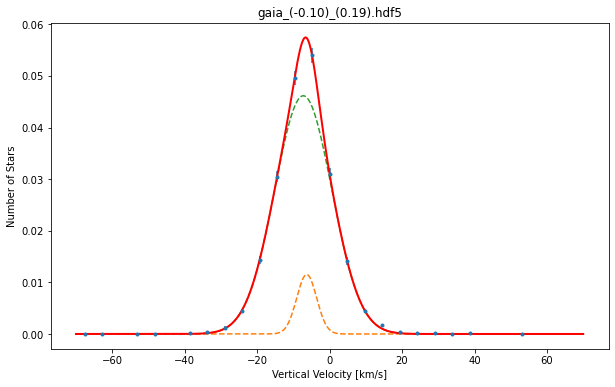

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

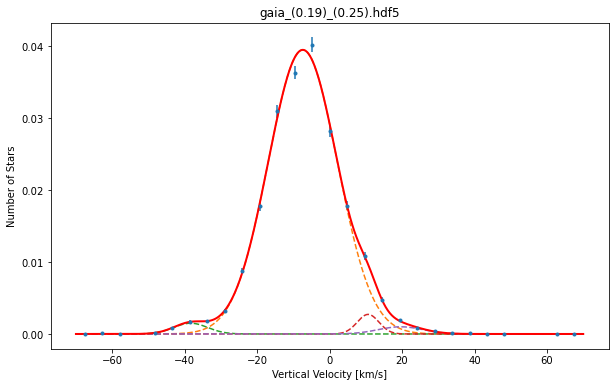

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

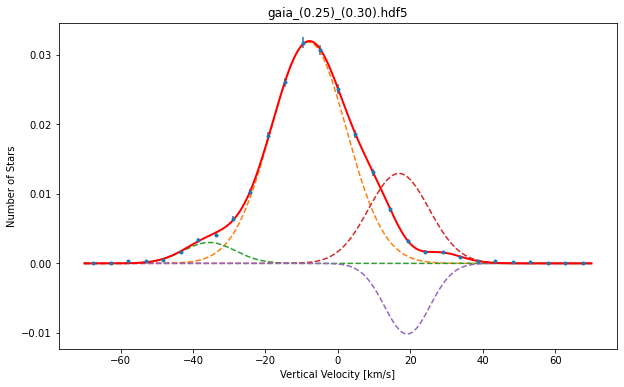

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.00s =  0.0m =  0.0h
 

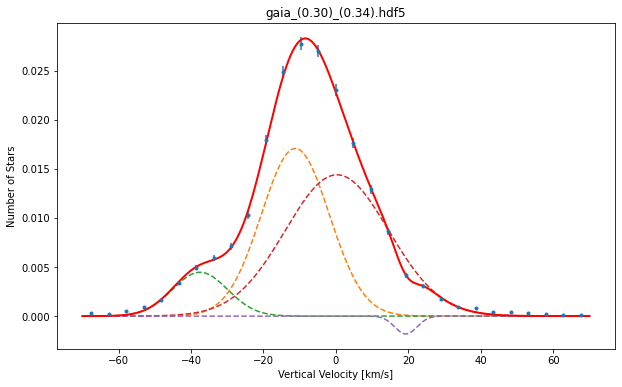

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

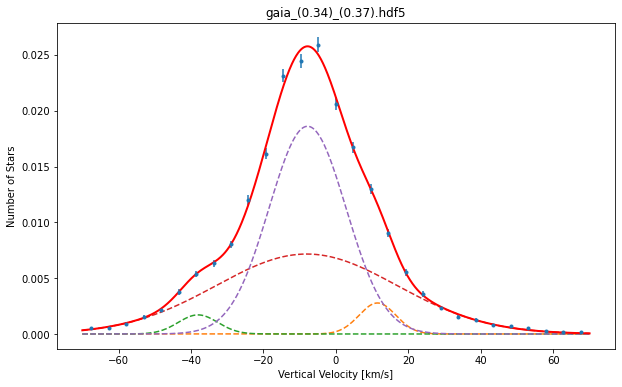

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

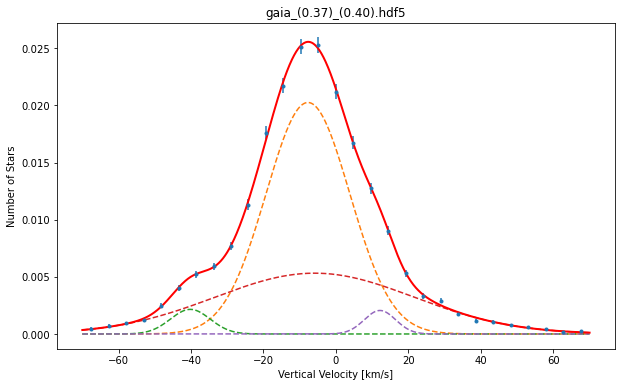

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [31]:

for file, popt in zip(files, popts):
    gaia_raw = vaex.open(file)
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    wedge = np.linspace(-70, 70, 30)
    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = wnum > 0
    wmid = wmid[mask]
    wnum = wnum[mask]
    area = wnum.sum() * (wedge[1] - wedge[0])
    ws = np.linspace(-70, 70, 1000)
    fw = n_gaussian(ws, *popt)
    werr = np.sqrt(wnum)

    plt.figure(figsize=(10, 6))
    plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')
    
    for i in range(len(popt)//3):
        plt.plot(ws, popt[3*i]*norm.pdf(ws, popt[3*i+1], popt[3*i+2]), '--')
    plt.plot(ws, fw, c="r", lw=2)
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.title(file.split("/")[-1])
    plt.show()
    df = vaex.from_arrays(w=wmid, wnum=wnum/area, werr=werr/area)
    df_popt = vaex.from_arrays(popt=popt)
    df.export(join(data_dir, file.split("/")[-1]), progress=True)
    df_popt.export(join(data_dir, "popt_" + file.split("/")[-1]), progress=True)


# LOAD

In [32]:
files = glob(join(data_dir, "gaia_*.hdf5"))
files_popt = glob(join(data_dir, "popt_gaia_*.hdf5"))
files.sort()
files_popt.sort()

In [33]:
index = 0
file = files[index]
name = file.split("/")[-1]
df = vaex.open(file)
df

#,w,wnum,werr
0,-67.58620689655172,8.05376582981559e-05,5.6948724323511066e-05
1,-62.758620689655174,4.026882914907795e-05,4.026882914907795e-05
2,-53.10344827586207,4.026882914907795e-05,4.026882914907795e-05
3,-48.275862068965516,8.05376582981559e-05,5.6948724323511066e-05
4,-38.62068965517241,0.00024161297489446772,9.863808395455469e-05
...,...,...,...
17,24.137931034482754,0.0001610753165963118,8.05376582981559e-05
18,28.96551724137931,0.00012080648744723386,6.974765804751361e-05
19,33.79310344827586,8.05376582981559e-05,5.6948724323511066e-05
20,38.620689655172406,0.0001610753165963118,8.05376582981559e-05


In [36]:
df_popt = vaex.open(files_popt[index])
df_popt

#,popt
0,0.0794162
1,-6.31396
2,2.75079
3,0.911303
4,-7.25886
5,7.87733


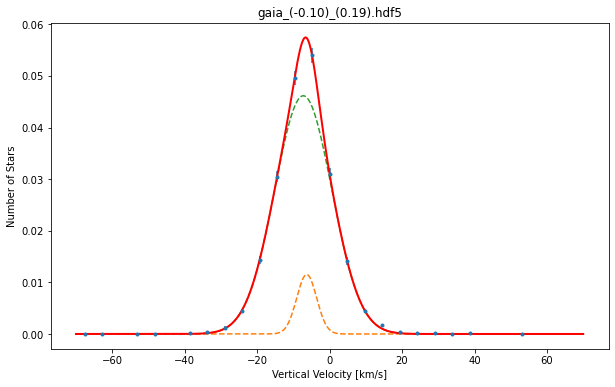

In [38]:
w = df['w'].to_numpy()
wnum = df['wnum'].to_numpy()
werr = df['werr'].to_numpy()

popt = df_popt['popt'].to_numpy()

ws = np.linspace(-70, 70, 1000)
fw = n_gaussian(ws, *popt)

plt.figure(figsize=(10, 6))
plt.errorbar(w, wnum, yerr=werr, fmt='.')
for i in range(len(popt)//3):
    plt.plot(ws, popt[3*i]*norm.pdf(ws, popt[3*i+1], popt[3*i+2]), '--')
plt.plot(ws, fw, c="r", lw=2)
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.title(name)
plt.show()

all in

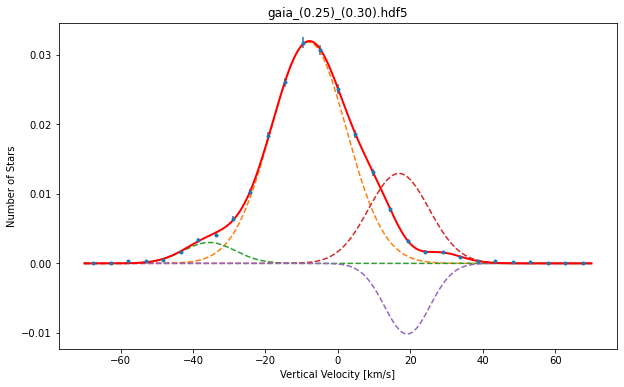

In [40]:
index = 2
file = files[index]
name = file.split("/")[-1]
df = vaex.open(file)

df_popt = vaex.open(files_popt[index])

w = df['w'].to_numpy()
wnum = df['wnum'].to_numpy()
werr = df['werr'].to_numpy()

popt = df_popt['popt'].to_numpy()

ws = np.linspace(-70, 70, 1000)
fw = n_gaussian(ws, *popt)

plt.figure(figsize=(10, 6))
plt.errorbar(w, wnum, yerr=werr, fmt='.')
for i in range(len(popt)//3):
    plt.plot(ws, popt[3*i]*norm.pdf(ws, popt[3*i+1], popt[3*i+2]), '--')
plt.plot(ws, fw, c="r", lw=2)
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.title(name)
plt.show()